In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cwd=os.getcwd()
print(cwd)

/Users/hannes/Documents/BSE/Challenge/Challenge-1


# Coding Challenge


## 1. Data Setup 



In [3]:
df=pd.read_csv("Wb4.csv")
df.head()

,Series Name,Series Code,Country Name,Country Code,2018 [YR2018]
0,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Afghanistan,AFG,553.973306037506
1,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Albania,ALB,4431.55559506989
2,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Algeria,DZA,4782.03470679763
3,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,American Samoa,ASM,13049.3301536176
4,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,Andorra,AND,39320.0924463621


In [4]:
df.shape


(656, 5)

In [5]:
df_pivot = df.pivot_table(index=['Country Name','Country Code'], columns='Series Name', values='2018 [YR2018]', aggfunc='first').reset_index()
df_pivot.columns = ['Country Name','Country Code', 'Health Expenditure', 'GDP', 'Life Expectancy']
df_pivot.head()

,Country Name,Country Code,Health Expenditure,GDP,Life Expectancy
0,Afghanistan,AFG,71.33430481,553.973306037506,63.081
1,Albania,ALB,351.3012085,4431.55559506989,79.184
2,Algeria,DZA,266.46469116,4782.03470679763,76.066
3,American Samoa,ASM,..,13049.3301536176,..
4,Andorra,AND,3164.38842773,39320.0924463621,..


In [135]:
df_pivot.shape

(217, 5)

In [6]:
print(df_pivot.dtypes)

Country Name          object
Country Code          object
Health Expenditure    object
GDP                   object
Life Expectancy       object
dtype: object


In [7]:
### In order to round the values we have to convert them to floats
columns_to_convert = ['Health Expenditure', 'GDP', 'Life Expectancy']
df_pivot[columns_to_convert] = df_pivot[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df_pivot = df_pivot.round()
df_pivot.head()

,Country Name,Country Code,Health Expenditure,GDP,Life Expectancy
0,Afghanistan,AFG,71.0,554.0,63.0
1,Albania,ALB,351.0,4432.0,79.0
2,Algeria,DZA,266.0,4782.0,76.0
3,American Samoa,ASM,NaN,13049.0,NaN
4,Andorra,AND,3164.0,39320.0,NaN


In [8]:
### inspecting for missing values
df_pivot.replace(to_replace=[".."], value=np.nan, inplace=True)
df_pivot.isna().sum() 
 

Country Name           0
Country Code           0
Health Expenditure    30
GDP                   10
Life Expectancy        8
dtype: int64

In [9]:
### dropping missing values
df_final = df_pivot.dropna()
df_final.isna().sum() 



Country Name          0
Country Code          0
Health Expenditure    0
GDP                   0
Life Expectancy       0
dtype: int64

In [10]:
### we have lost data on 37 countries by dropping the missing values
df_final.shape


(180, 5)

Final dataset: observations on 180 countries on : 
GDP - GDP per capita in US$,
Health Expenditure - Current health expenditure per capita in US$,
Life Expectancy - Life expectancy at birth in years

## 2. Data Exploration

In [159]:
# Data Exploration
df.describe()


,Country Name,Country Code,Health Expenditure,GDP,Life Expectancy
count,217,217,217,217,217
unique,217,217,187,208,210
top,Afghanistan,AFG,..,..,..
freq,1,1,30,10,8


In [160]:
df_final.nlargest(2, 'GDP')

,Country Name,Country Code,Health Expenditure,GDP,Life Expectancy
116,Luxembourg,LUX,6227.0,106377.0,82.0
188,Switzerland,CHE,9212.0,86757.0,84.0


In [161]:
df_final.nsmallest(2, 'GDP')

,Country Name,Country Code,Health Expenditure,GDP,Life Expectancy
31,Burundi,BDI,19.0,274.0,62.0
37,Central African Republic,CAF,49.0,378.0,54.0


Text(0, 0.5, 'Frequency')

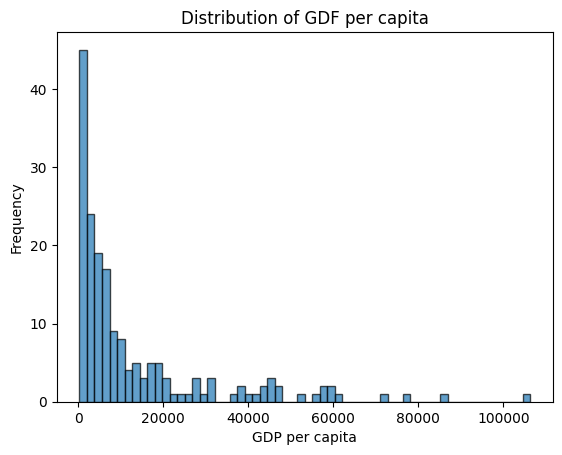

In [12]:
plt.hist(df_final['GDP'], bins=60, edgecolor='k', alpha=0.7)
plt.title(f'Distribution of GDF per capita')
plt.xlabel('GDP per capita')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

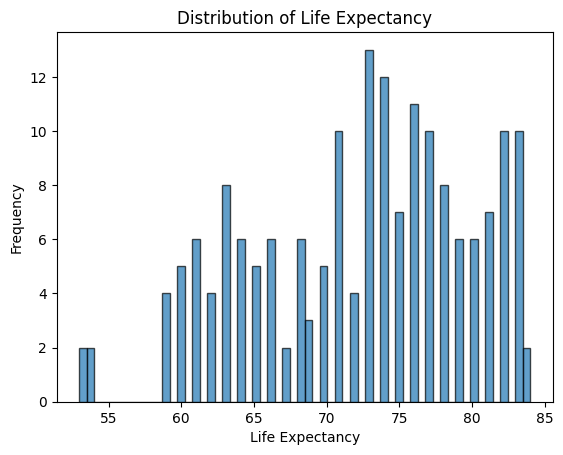

In [13]:
plt.hist(df_final['Life Expectancy'], bins=60, edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

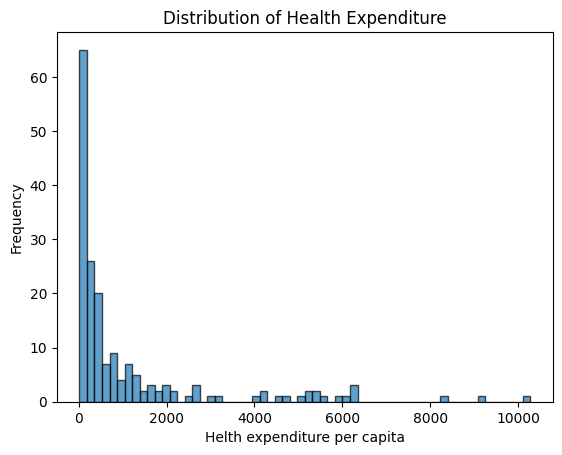

In [16]:
plt.hist(df_final['Health Expenditure'], bins=60, edgecolor='k', alpha=0.7)
plt.title(f'Distribution of Health Expenditure')
plt.xlabel('Helth expenditure per capita')
plt.ylabel('Frequency')

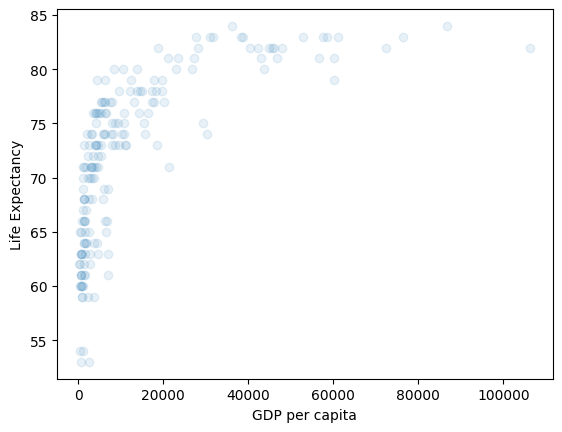

In [20]:
plt.scatter(df_final["GDP"], df_final["Life Expectancy"], alpha=0.1)
plt.autoscale(True)
plt.xlabel('GDP per capita')
#plt.xscale('log')
plt.ylabel('Life Expectancy')
#plt.yscale('log')
plt.show()

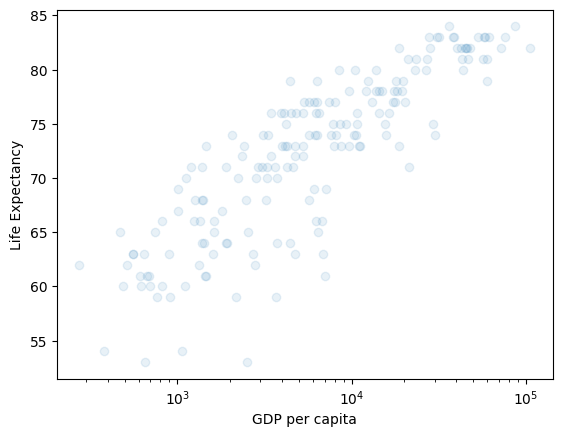

In [21]:
plt.scatter(df_final["GDP"], df_final["Life Expectancy"], alpha=0.1)
plt.autoscale(True)
plt.xlabel('GDP per capita')
plt.xscale('log')
plt.ylabel('Life Expectancy')


plt.show()